In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gaussian_process import GaussianProcessExpectationPropagation
from gaussian_process.kernels import RBF
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

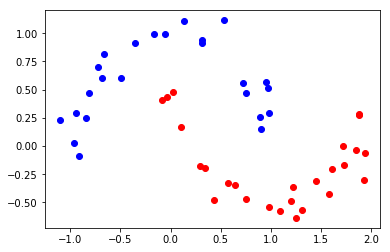

In [3]:
X, y = make_moons(100, noise=0.1, random_state=0)
Xtr, Xte, ytr, yte = train_test_split(X, 2*y-1, train_size=0.5, random_state=0)
plt.plot(Xtr[ytr>0, 0], Xtr[ytr>0, 1], "ro")
plt.plot(Xtr[ytr<0, 0], Xtr[ytr<0, 1], "bo")

0.92


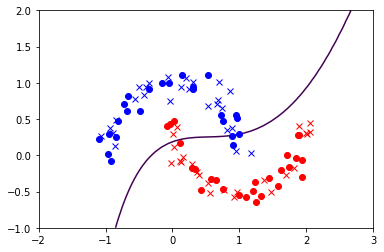

In [4]:
gpc = GaussianProcessExpectationPropagation(RBF())
gpc.fit(Xtr, ytr)
Xgrid = np.meshgrid(np.linspace(-2, 3), np.linspace(-1, 2))
ygrid = gpc.decision_function(np.stack(Xgrid, 2).reshape(-1, 2)).reshape(50, 50)
plt.plot(Xtr[ytr>0, 0], Xtr[ytr>0, 1], "ro")
plt.plot(Xtr[ytr<0, 0], Xtr[ytr<0, 1], "bo")
plt.plot(Xte[yte>0, 0], Xte[yte>0, 1], "rx")
plt.plot(Xte[yte<0, 0], Xte[yte<0, 1], "bx")
plt.contour(Xgrid[0], Xgrid[1], ygrid, levels=[0.5])
print(gpc.score(Xte, yte))

GaussianProcessExpectationPropagation(cov=RBF(beta=3.111668344731513, sigma=58150.029605734213))
0.98


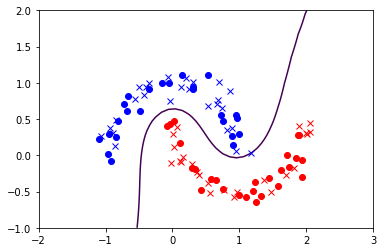

In [5]:
gpc.empirical_bayes()
ygrid = gpc.decision_function(np.stack(Xgrid, 2).reshape(-1, 2)).reshape(50, 50)
plt.plot(Xtr[ytr>0, 0], Xtr[ytr>0, 1], "ro")
plt.plot(Xtr[ytr<0, 0], Xtr[ytr<0, 1], "bo")
plt.plot(Xte[yte>0, 0], Xte[yte>0, 1], "rx")
plt.plot(Xte[yte<0, 0], Xte[yte<0, 1], "bx")
plt.contour(Xgrid[0], Xgrid[1], ygrid, levels=[0.5])
print(gpc)
print(gpc.score(Xte, yte))